In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile


In [235]:
data = pd.read_excel('Data Untuk DQLab Challenge_AmarthaProperty.xlsx', sheetname='Data')

In [236]:
data.head()

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
0,POINTID_42,2018-10-20,AREAID_27,REGION_JR1,2017-09-09,1108,5,1%-2.5%,2150,20,3.0
1,POINTID_35,2018-10-20,AREAID_1,REGION_JH,2017-07-29,1515,7,5%-10%,2500,110,1.0
2,POINTID_24,2018-10-20,AREAID_20,REGION_JH,2017-06-10,1092,5,2.5%-5%,1850,75,7.0
3,POINTID_62,2018-10-20,AREAID_13,REGION_JR2,2018-05-05,683,3,0%,1600,145,17.0
4,POINTID_45,2018-10-20,AREAID_21,REGION_JR1,2017-09-16,2294,8,0%-1%,4300,50,7.0


In [237]:
data.describe()

,active_borrowers,active_agent,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
count,3703.000000,3703.000000,3703.000000,3703.000000,3540.000000
mean,891.071294,5.139076,2050.823656,121.147718,11.155932
std,665.761622,2.323940,1517.108892,100.785237,8.297007
min,8.000000,1.000000,0.000000,0.000000,0.000000
25%,319.500000,3.000000,850.000000,50.000000,5.000000
50%,810.000000,5.000000,1800.000000,100.000000,9.000000
75%,1330.000000,7.000000,2950.000000,165.000000,15.000000
max,2985.000000,13.000000,7800.000000,830.000000,77.000000


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 11 columns):
branch                        3703 non-null object
cutoff_date                   3703 non-null object
area                          3703 non-null object
region                        3703 non-null object
first_date_disbursement       3703 non-null object
active_borrowers              3703 non-null int64
active_agent                  3703 non-null int64
deliquency_rate               3703 non-null object
outstanding                   3703 non-null int64
weekly_disbursement           3703 non-null int64
weekly_new_borrower_per_bp    3540 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 318.3+ KB


In [239]:
data.loc[data['deliquency_rate']== '0%','deliquency_rate'] = 1
data.loc[data['deliquency_rate']== '0%-1%','deliquency_rate'] = 2
data.loc[data['deliquency_rate']== '1%-2.5%','deliquency_rate'] = 3
data.loc[data['deliquency_rate']== '2.5%-5%','deliquency_rate'] = 4
data.loc[data['deliquency_rate']== '5%-10%','deliquency_rate'] = 5
data.loc[data['deliquency_rate']== '>10%','deliquency_rate'] = 6

In [240]:
data['deliquency_rate'] = data['deliquency_rate'].astype('float')

In [241]:
data.loc[data['weekly_new_borrower_per_bp'].isnull(),'weekly_new_borrower_per_bp'] = data['weekly_new_borrower_per_bp'].mean()

In [242]:
num = data.columns[5:]

In [243]:
def insert_data(branch):
    x = []
    for col in num:
        x.append(data.loc[data['branch']==branch].describe().loc['mean',col])
    return x

In [244]:
data_per_branch = []
for i in data['branch'].unique():
    data_per_branch.append(insert_data(i))

In [245]:
data_per_branch = np.array(data_per_branch)

In [246]:
num

Index(['active_borrowers', 'active_agent', 'deliquency_rate', 'outstanding',
       'weekly_disbursement', 'weekly_new_borrower_per_bp'],
      dtype='object')

In [247]:
new_data = pd.DataFrame({'branch':data['branch'].unique(),'active_borrowers':data_per_branch[:,0],'active_agent':data_per_branch[:,1],
             'deliquency_rate':data_per_branch[:,2],'outstanding':data_per_branch[:,3],'weekly_disbursement':data_per_branch[:,4],
             'weekly_new_borrower_per_bp':data_per_branch[:,5]})

In [248]:
new_data.head()

,active_agent,active_borrowers,branch,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
0,4.421053,785.508772,POINTID_42,1.140351,1853.508772,98.859649,9.406244
1,4.968254,1004.777778,POINTID_35,2.603175,1975.396825,101.349206,9.732634
2,4.058824,591.044118,POINTID_24,1.220588,1135.294118,57.573529,7.381406
3,2.217391,327.826087,POINTID_62,1.000000,802.173913,86.304348,16.137214
4,7.767857,1302.267857,POINTID_45,1.232143,3075.000000,175.178571,11.484927


In [249]:
new_data.describe()

,active_agent,active_borrowers,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,3.730403,587.231920,1.292855,1384.068674,108.341511,13.572374
std,2.075832,461.143313,0.602047,1044.621764,41.536605,4.315809
min,1.000000,33.666667,1.000000,75.000000,6.250000,5.849252
25%,2.000000,200.792208,1.000000,559.740260,81.337793,10.072246
50%,2.600000,342.476190,1.000000,957.500000,102.500000,13.419915
75%,5.676587,953.740680,1.268438,2154.956697,129.913265,16.068607
max,9.303797,2068.177215,5.000000,4913.291139,252.658228,25.454545


In [250]:
#indeks 96 adalah cabang POINTID_118 yang nilainya aneh
new_data = new_data.drop(96)

## Clustering and Analysis

In [215]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
X_scaled = preprocessing.scale(new_data.drop('branch',axis=1))
pca = PCA(n_components=2)
df = pca.fit_transform(X_scaled)
df = pd.DataFrame(df)

In [216]:
pca.explained_variance_ratio_

array([ 0.68219917,  0.21375032])

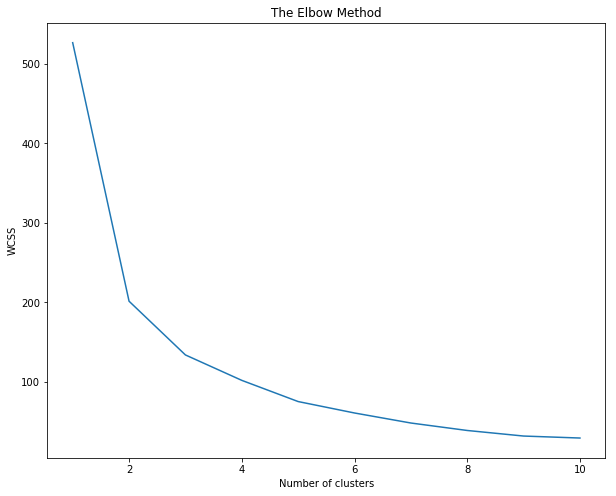

In [217]:
n_init = 10
max_iter = 300
tol = 0.0001
n_jobs = 2

plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=n_init,
                   max_iter=max_iter,tol = tol,n_jobs=n_jobs)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

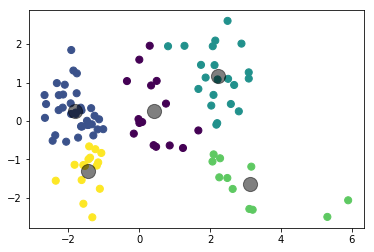

In [218]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42,n_init=n_init,
                   max_iter=max_iter,tol = tol,n_jobs=n_jobs)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
plt.scatter(df.loc[:, 0], df.loc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [219]:
new_data['cluster'] =  pd.Series(y_kmeans)

In [220]:
new_data = new_data[['branch','active_agent','active_borrowers','deliquency_rate','outstanding',
                    'weekly_disbursement','weekly_new_borrower_per_bp','cluster']]
new_data.head()

,branch,active_agent,active_borrowers,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,cluster
0,POINTID_42,4.421053,785.508772,1.140351,1853.508772,98.859649,9.406244,0.0
1,POINTID_35,4.968254,1004.777778,2.603175,1975.396825,101.349206,9.732634,2.0
2,POINTID_24,4.058824,591.044118,1.220588,1135.294118,57.573529,7.381406,0.0
3,POINTID_62,2.217391,327.826087,1.000000,802.173913,86.304348,16.137214,1.0
4,POINTID_45,7.767857,1302.267857,1.232143,3075.000000,175.178571,11.484927,3.0


In [221]:
new_data.loc[new_data['branch'] == 'POINTID_8',:]

,branch,active_agent,active_borrowers,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,cluster
49,POINTID_8,7.046296,1220.972222,1.092593,2276.388889,121.018519,8.998807,2.0


In [222]:
def cl(n):
    value = []
    for i in num:
        value.append(new_data.loc[new_data['cluster']==n,:].describe().loc['mean',i])
    return value

In [223]:
cluster_0 = cl(0)
cluster_1 = cl(1)
cluster_2 = cl(2)
cluster_3 = cl(3)
cluster_4 = cl(4)
#cluster_5 = cl(5)


In [224]:
num

Index(['active_borrowers', 'active_agent', 'deliquency_rate', 'outstanding',
       'weekly_disbursement', 'weekly_new_borrower_per_bp'],
      dtype='object')

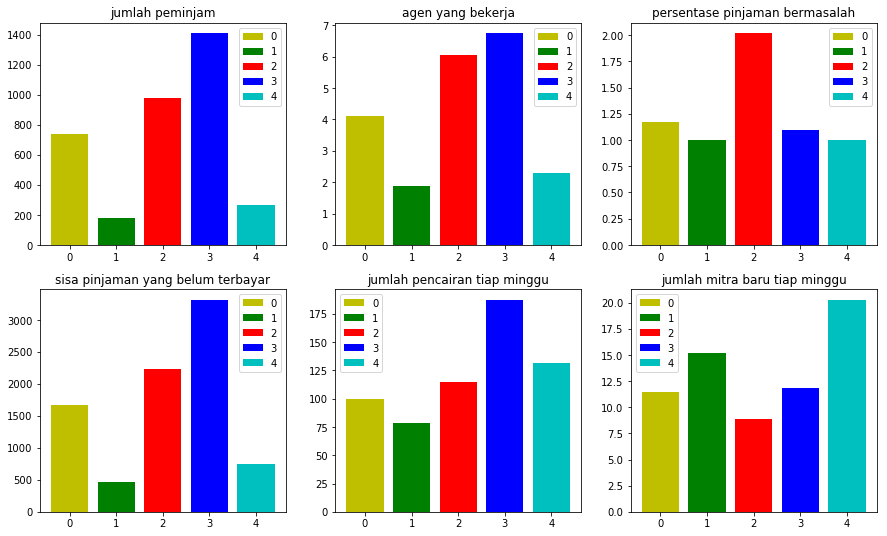

In [225]:
x = 0
w= 1
plt.figure(figsize=(15,9))
label = ['jumlah peminjam','agen yang bekerja','persentase pinjaman bermasalah','sisa pinjaman yang belum terbayar',
        'jumlah pencairan tiap minggu','jumlah mitra baru tiap minggu']
for i in range(1, 7):
    plt.subplot(2, 3, i)
    fig1 = plt.bar(x,cluster_0[i-1],color='y')
    fig2 = plt.bar(x+w,cluster_1[i-1],color='g')
    fig3 = plt.bar(x+2*w,cluster_2[i-1],color='r')
    fig4 = plt.bar(x+3*w,cluster_3[i-1],color='b')
    fig5 = plt.bar(x+4*w,cluster_4[i-1],color='c')
    #fig6 = plt.bar(x+5*w,cluster_5[i-1],color='m')
    plt.title(label[i-1])
    plt.legend(['0','1','2','3','4'])
plt.savefig('graph1.png')
plt.show()

#### Hipotesis 1

Cluster 0 kemungkinan adalah cabang yang sudah cukup lama beroperasi, namun memiliki performa yang baik dengan kecilnya rata-rata persentase pinjaman yang bermasalah. Sisa pinjaman yg belum terbayar, jumlah pencairan tiap minggu dan jumlah mitra baru tiap minggunya dalam angka menengah tidak terlalu rendah atau tinggi.


Cluster 1 kemungkinan adalah cabang baru, karena memiliki rata-rata jumlah peminjam yang rendah namun memiliki rata-rata jumlah mitra baru tiap minggu yang relatif lebih tinggi. Cluster ini masih memiliki nilai rata2 persentase pinjaman bermasalah yg rendah.

Cluster 2 kemungkinan adalah cabang yg sudah cukup lama beroperasi namun performanya buruk krna rata2 persentase pinjaman bermasalahnya paling tinggi. Cluster ini jg merupakan cluster yang memiliki rata2 jumlah mitra baru paling sedikit.

Cluster 3 kemungkinan adalah cabang yg beroperasi cukup lama namun rata2 persentase pinjaman bermasalahnya relatif kecil, dan rata2 jumlah mitra barunya dalam tingkat menengah. Rata2 sisa pinjaman yg blm terbayar serta jumlah pencairan tiap minggunya paling tinggi kemungkinan disebabkan oleh rata2 jumlah peminjamnya yg banyak.

Cluster 4 kemungkinan adalah cabang baru krna rata2 jumlah peminjamnya relatif sedikit, namun cluster ini memiliki jumlah mitra baru paling tinggi

#### Analisis selanjutnya untuk validasi hipotesis di atas dan melihat pengaruh variabel terhadap persentase pinjaman bermasalah yaitu dengan membuat variabel baru dari rasio variabel lama

In [80]:
num

Index(['active_borrowers', 'active_agent', 'deliquency_rate', 'outstanding',
       'weekly_disbursement', 'weekly_new_borrower_per_bp'],
      dtype='object')

In [142]:
borrower_agent_ratio = new_data.loc[:,'active_agent']/new_data.loc[:,'active_borrowers']*100
outstanding_disbursement_ratio = new_data.loc[:,'outstanding']/new_data.loc[:,'weekly_disbursement']
borrower_new_borrower_ratio = new_data.loc[:,'weekly_new_borrower_per_bp']/new_data.loc[:,'active_borrowers']*100
borrower_disbursement_ratio = new_data.loc[:,'active_borrowers']/new_data.loc[:,'weekly_disbursement']

In [143]:
new_data_var = pd.DataFrame({'rasio pekerja dan peminjam':borrower_agent_ratio, 'rasio sisa pinjaman dan pencairan':outstanding_disbursement_ratio,
                            'rasio peminjam baru dan lama':borrower_new_borrower_ratio,'rasio peminjam dan pencairan': borrower_disbursement_ratio,
                            'cluster':new_data.loc[:,'cluster']})

In [144]:
new_data_var.head()

,cluster,rasio pekerja dan peminjam,rasio peminjam baru dan lama,rasio peminjam dan pencairan,rasio sisa pinjaman dan pencairan
0,0.0,0.562827,1.197472,7.945697,18.748891
1,2.0,0.494463,0.968635,9.914017,19.490995
2,0.0,0.686721,1.248876,10.265900,19.719029
3,1.0,0.676393,4.922492,3.798489,9.294710
4,3.0,0.596487,0.881917,7.433945,17.553517


In [145]:
col = list(new_data_var.columns[1:])
col

['rasio pekerja dan peminjam',
 'rasio peminjam baru dan lama',
 'rasio peminjam dan pencairan',
 'rasio sisa pinjaman dan pencairan']

In [146]:
new_data_var.loc[new_data_var['cluster']==0,col]

,rasio pekerja dan peminjam,rasio peminjam baru dan lama,rasio peminjam dan pencairan,rasio sisa pinjaman dan pencairan
0,0.562827,1.197472,7.945697,18.748891
2,0.686721,1.248876,10.265900,19.719029
13,0.482996,1.414204,7.720169,16.567797
14,0.589704,1.887907,9.092020,18.566085
15,0.466423,1.662458,9.070673,18.185096
22,0.436146,1.610913,8.228411,16.859813
30,0.501548,1.558032,7.021230,18.871104
35,0.740840,1.293528,8.526527,17.604962
42,0.423946,1.164929,7.239460,17.605396
44,0.463044,1.612675,9.069921,18.183882


In [147]:
def new_cl(n):
    global col
    value = []
    for i in col:
        value.append(new_data_var.loc[new_data_var['cluster']==n,:].describe().loc['mean',i])
    return value

In [148]:
new_cluster0 = new_cl(0)
new_cluster1 = new_cl(1)
new_cluster2 = new_cl(2)
new_cluster3 = new_cl(3)
new_cluster4 = new_cl(4)

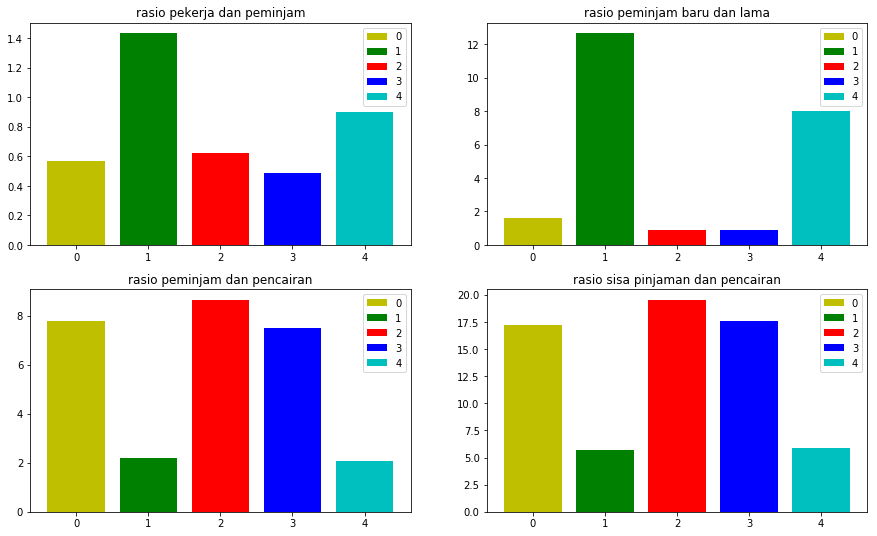

In [149]:
x = 0
w= 1
plt.figure(figsize=(15,9))
label = new_data_var.columns[1:]
for i in range(1, 5):
    plt.subplot(2, 2, i)
    fig1 = plt.bar(x,new_cluster0[i-1],color='y')
    fig2 = plt.bar(x+w,new_cluster1[i-1],color='g')
    fig3 = plt.bar(x+2*w,new_cluster2[i-1],color='r')
    fig4 = plt.bar(x+3*w,new_cluster3[i-1],color='b')
    fig5 = plt.bar(x+4*w,new_cluster4[i-1],color='c')
    plt.title(label[i-1])
    plt.legend(['0','1','2','3','4'])
plt.savefig('graph2.png')
plt.show()

Dari grafik dapat divalidasi bahwa hipotesis mengenai masing-masing cluster adalah benar. Cluster 1 dan 4 adalah cabang baru yang dikarakteristikkan oleh rasio peminjam baru dan lama yang tinggi, namun rasio peminjam dan pencairan serta rasio sisa pinjaman dan pencairannya rendah. Dari rasio2 tersebut juga dapat terbukti bahwa cluster 0, 2, dan 3 adalah cabang lama.

Hal ini juga dapat divalidasi dari variabel 'first_date_disbursement'

#### Hipotesis 2: Variabel penting yang membedakan antara cluster adalah rasio peminjam dan pencairan serta rasio sisa pinjaman dan pencairan. Hal ini terlihat dari cluster 2 memiliki nilai paling tinggi untuk dua variabel tersebut, sedangkan cluster 0 dan 3 hampir sama walaupun perbedaannya sedikit.

In [162]:
branch1 = new_data.loc[new_data['cluster']==1,'branch']
for i in branch1:
    print(i,data.loc[data['branch']==i,'first_date_disbursement'].unique())

POINTID_62 ['2018-05-05']
POINTID_111 ['2018-09-22']
POINTID_103 ['2018-08-18']
POINTID_98 ['2018-07-14']
POINTID_80 ['2018-07-21']
POINTID_59 ['2018-05-05']
POINTID_82 ['2018-07-21']
POINTID_113 ['2018-09-29']
POINTID_64 ['2018-05-05']
POINTID_92 ['2018-07-28']
POINTID_104 ['2018-09-15']
POINTID_83 ['2018-07-14']
POINTID_86 ['2018-07-21']
POINTID_89 ['2018-07-28']
POINTID_63 ['2018-05-05']
POINTID_73 ['2018-05-26']
POINTID_61 ['2018-07-21']
POINTID_91 ['2018-07-28']
POINTID_71 ['2018-06-02']
POINTID_99 ['2018-08-18']
POINTID_102 ['2018-08-04']
POINTID_88 ['2018-09-08']
POINTID_100 ['2018-08-11']
POINTID_110 ['2018-09-08']
POINTID_112 ['2018-09-29']
POINTID_107 ['2018-08-25']
POINTID_81 ['2018-07-21']
POINTID_77 ['2018-07-14']
POINTID_60 ['2018-04-28']
POINTID_96 ['2018-08-18']
POINTID_65 ['2018-05-26']
POINTID_109 ['2018-09-08']
POINTID_90 ['2018-08-11']
POINTID_72 ['2018-05-19']
POINTID_79 ['2018-08-04']


In [163]:
branch4 = new_data.loc[new_data['cluster']==4,'branch']
for i in branch4:
    print(i,data.loc[data['branch']==i,'first_date_disbursement'].unique())

POINTID_94 ['2018-07-28']
POINTID_101 ['2018-08-04']
POINTID_85 ['2018-08-04']
POINTID_87 ['2018-07-21']
POINTID_95 ['2018-08-11']
POINTID_76 ['2018-08-11']
POINTID_68 ['2018-06-30']
POINTID_93 ['2018-07-28']
POINTID_105 ['2018-08-25']
POINTID_78 ['2018-05-26']
POINTID_66 ['2018-05-26']
POINTID_75 ['2018-05-26']
POINTID_108 ['2018-08-18']
POINTID_74 ['2018-07-07']
POINTID_97 ['2018-07-21']


In [164]:
branch0 = new_data.loc[new_data['cluster']==0,'branch']
for i in branch0:
    print(i,data.loc[data['branch']==i,'first_date_disbursement'].unique())

POINTID_42 ['2017-09-09']
POINTID_24 ['2017-06-10']
POINTID_54 ['2017-11-11']
POINTID_57 ['2017-11-11']
POINTID_56 ['2017-11-11']
POINTID_53 ['2017-11-11']
POINTID_33 ['2017-07-22']
POINTID_25 ['2017-06-10']
POINTID_34 ['2017-07-15']
POINTID_55 ['2017-11-04']
POINTID_28 ['2017-06-03']
POINTID_48 ['2017-09-09']
POINTID_58 ['2018-01-13']
POINTID_70 ['2018-05-12']
POINTID_67 ['2018-04-28']


In [165]:
branch2 = new_data.loc[new_data['cluster']==2,'branch']
for i in branch2:
    print(i,data.loc[data['branch']==i,'first_date_disbursement'].unique())

POINTID_35 ['2017-07-29']
POINTID_50 ['2017-09-09']
POINTID_20 ['2017-04-22']
POINTID_22 ['2017-04-29']
POINTID_10 ['2016-09-10']
POINTID_49 ['2017-09-16']
POINTID_8 ['2016-09-03']
POINTID_38 ['2017-08-12']
POINTID_37 ['2017-08-05']
POINTID_44 ['2017-09-09']
POINTID_36 ['2017-08-12']
POINTID_32 ['2017-07-22']
POINTID_51 ['2017-09-09']
POINTID_15 ['2016-11-12']
POINTID_23 ['2017-05-06']
POINTID_14 ['2016-10-15']
POINTID_43 ['2017-09-09']
POINTID_12 ['2016-10-08']
POINTID_41 ['2017-08-19']
POINTID_9 ['2016-09-17']
POINTID_19 ['2017-04-15']


In [166]:
branch3 = new_data.loc[new_data['cluster']==3,'branch']
for i in branch3:
    print(i,data.loc[data['branch']==i,'first_date_disbursement'].unique())

POINTID_45 ['2017-09-16']
POINTID_52 ['2017-09-09']
POINTID_46 ['2017-09-16']
POINTID_16 ['2017-03-25']
POINTID_40 ['2017-08-26']
POINTID_31 ['2017-07-29']
POINTID_47 ['2017-09-16']
POINTID_39 ['2017-08-19']
POINTID_30 ['2017-07-29']
POINTID_29 ['2017-07-29']
POINTID_17 ['2017-03-25']


#### Terbukti bahwa hipotesis 1 masing-masing cluster adalah benar

In [230]:
new_data_var['branch'] = new_data['branch'].copy()

In [226]:
new_data.to_excel('amartha.xlsx')

In [232]:
new_data_var.to_excel('new var amartha.xlsx')

#### Analisis selanjutnya dilakukan dengan Tableau